# Temporal Demand Patterns and Seasonality

To monitor the operational performance of the vehicle fleet in Philadelphia in the year 2016, this notebook will visualize how the fleet usage varies per weekday, per week and during the whole year.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
trips_hourly = pd.read_parquet('../../data/trips_hourly_date_information.parquet')

# Fleet Usage

In [3]:
#Create feature of starting and ongoing trips per hour
trips_hourly["ongoing_trips_total"] = trips_hourly["trips_starting"] + trips_hourly["trips_prev_active"]

In [4]:
#Group by weekday
weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips_hourly_weekday = trips_hourly.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_weekday = pd.DataFrame(trips_hourly_weekday)

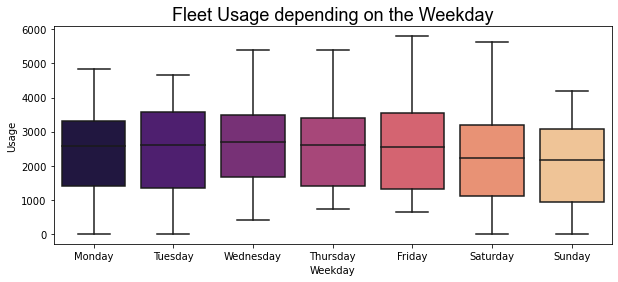

In [5]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_weekday.index.get_level_values(1), y=trips_hourly_weekday["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Weekday", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
ax.set_xticklabels(weekday)
plt.show()
#ax.figure.savefig("../../figures/Weekday_Usage.png")

Looking at the plot, one can say that the fleet usage during business days is higher than the usage during the weekends. The variance of trips on all days is fairly constant with Saturday having the widest range. The demand on Saturday probably varies that much because of spontaneous trips people take on the weekends that differ from the regular trips during the business week. Overall, Wednesday has the highest median of all days.

In [6]:
#Group by hour
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
trips_hourly_hour = trips_hourly.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_hour = pd.DataFrame(trips_hourly_hour)

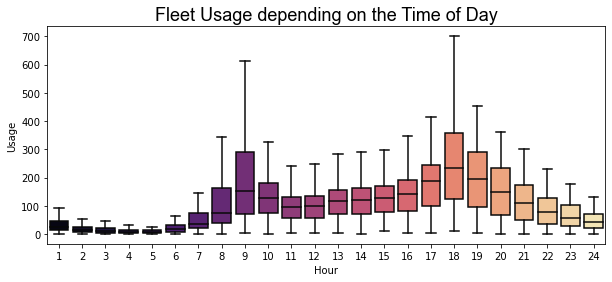

In [7]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_hour.index.get_level_values(1), y=trips_hourly_hour["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Time of Day", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
ax.set_xticklabels(time)
plt.show()
#ax.figure.savefig("../../figures/Time_Usage.png")

For the daily usage, one can infer that the usage during the day is always higher than during the night and early morning (0-6am). Starting at 7am the demand slowly rises and reaches its first peak at 8am with an increased demand the hour before and after. The demand then stays fairly constant before rising slowly towards the next peak at 6pm. This is the time with the highest demand for our bike fleet, therefore it is likely that our fleet is used by many commuters to get to work and especially to get back home in the evening. 

In [8]:
#Group by month and plot
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
trips_hourly_month = trips_hourly.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_month = pd.DataFrame(trips_hourly_month)

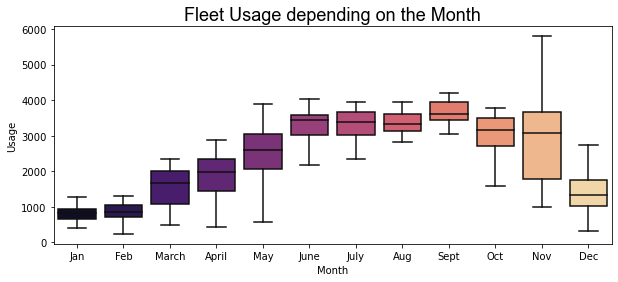

In [9]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_month.index.get_level_values(1), y=trips_hourly_month["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Month", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
ax.set_xticklabels(months)
plt.show()
#ax.figure.savefig("../../figures/Month_Usage.png")

Moving on to the yearly demand, we can reason that the summer months from June-September have the highest demand with September being the busiest. The winter months from December-February show the lowest demand and the demand generally rises towards summer and falls again afterwards. May and November have a noticeable high variance which might be connected to
the weather and probably results from particularly nice spring and autumn days. In the following, we will take a closer look at Philadelphia's weather to see if it correlates to the bike fleet demand.

# Weather in Philadelphia

In [10]:
#Import data
trips_df = pd.read_parquet("../../data/bike_trips_cleaned.parquet")
trips_df.head(3)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,end_station_name,start_station_name,duration,start_lat,start_lon,end_lat,end_lon,distance,speed,average_time,date_time,max_temp,min_temp,precip
index,,,,,,,,,,,,,,,,,,,,
0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,3041,3564,Indego30,"Girard Station, MFL",2nd & Market,0 days 00:10:00,39.949895,-75.143749,39.969241,-75.136180,1.005648,6.033888,2016-01-01 00:09:00,2016-01-01,6.7,6.7,0.0
1,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,3019,2629,Indego30,6th & Race,4th & Bainbridge,0 days 00:22:00,39.940735,-75.149370,39.954694,-75.149496,0.397798,1.084905,2016-01-01 00:18:00,2016-01-01,6.7,6.7,0.0
2,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,3066,3430,Indego30,19th & Lombard,"11th & Pine, Kahn Park",0 days 00:13:00,39.945123,-75.159952,39.945664,-75.173272,1.480278,6.832050,2016-01-01 00:20:30,2016-01-01,6.7,6.7,0.0


In [11]:
# Add column with months to dataset

trips_df['month'] = trips_df['date_time'].dt.month_name()

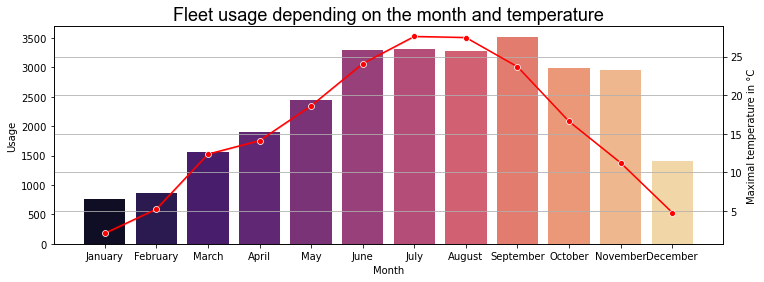

In [12]:
#Displaying values graphically

fig,ax = plt.subplots(figsize=(12,4)) 

sns.barplot(x=trips_hourly_month.index.get_level_values(1), y=trips_hourly_month["ongoing_trips_total"], ax=ax, ci=None, palette="magma")
ax.set_title("Fleet usage depending on the month and temperature", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")

ax2 = ax.twinx()
sns.lineplot(x=trips_df["month"], y=trips_df["max_temp"], ax=ax2, color='red', marker='o')
ax2.set_ylabel("Maximal temperature in °C")

plt.grid(True)
plt.show()

#ax.figure.savefig("../../figures/Weather.png")

Looking at the combination of demand and temperature, we can see that the demand rises and falls with the temperature with October and November being an exception. During the winter monhts and a temperature of 5°C or under the demand is low. Starting with temperatures over 12° in March the demand rises and the highest demand occurs during September with temperatures around 23°C. <p>
Even though October and November shows a lower temperature than spring months, we can observe a higher usage. This might have to do with precipation and it seems like the weather in Autumn is better suited for biking than the weather in spring with the weather in summr being the most favorable for bike trips.